In [ ]:
# Combine the csv files into one file
# The csv files are from this current directory
import glob
import os
import pandas as pd
import numpy as np
import plotnine as p9
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, RobustScaler
from skbio.stats.composition import clr

In [ ]:

# dataset_name = 'amgut2_data'


dataset_list = ['baxter_crc_data', 'crohns_data', 'glne007_data', 'global_patterns_data', 'esophagus_data', 'enterotype_data', 'hmp2prot_data', 'hmp216S_data', 'mixmpln_real_data', 'soilrep_data', 'ioral_data' ]

dataset_list = ['amgut1_data', 'amgut2_data']

for dataset_name in dataset_list:
    dataset_df = pd.read_csv(f'./{dataset_name}_update.csv', header=0, index_col=0)
    # dataset_df = pd.read_csv(f'./{dataset_name}_update.csv', header=0)
    dataset_df_log = np.log(dataset_df + 1)
    dataset_df_log = np.log(dataset_df_log + 1)
    dataset_df_scaled = pd.DataFrame(StandardScaler().fit_transform(dataset_df_log), columns=dataset_df.columns) 
    dataset_df_scaled.to_csv(f'./{dataset_name}_log2_standard_scaled_transformed.csv', index=False)

# scale the data
# scaled_dataset_df = pd.DataFrame(StandardScaler(with_mean=False).fit_transform(dataset_df)) 
# clr transform the data
# change the data to be a numpy array
# dataset_np = dataset_df.to_numpy()
# clr transform the data
# dataset_np_clr = clr(dataset_np)

# clr_dataset_df = pd.DataFrame(clr(dataset_df))

# scaled_dataset_df.to_csv(f'./{dataset_name}_super_scaled.csv')
print(dataset_df.shape)
print(dataset_df_scaled.shape)
print(dataset_df)
print(dataset_df_scaled)

In [ ]:

from sklearn.preprocessing import *
import pandas as pd
import numpy as np

# dataset_list = ['baxter_crc_data', 'crohns_data', 'glne007_data', 'global_patterns_data', 'esophagus_data', 'enterotype_data', 'hmp2prot_data', 'hmp216S_data', 'mixmpln_real_data', 'soilrep_data', 'ioral_data' ]
# dataset_list = ['amgut1_data', 'amgut2_data']
dataset_list = ['amgut2_data']


for dataset_name in dataset_list:
    dataset_df = pd.read_csv(f'./{dataset_name}_update.csv', header=0)
    # Add 1 to all the values
    # dataset_df = dataset_df + 1
    # dataset_df = pd.read_csv(f'./{dataset_name}_update.csv', header=0)
    # data_transformed = PowerTransformer().fit_transform(dataset_df)
    # Fit transformer to data
    # Transform data to normal distribution
    data_transformed = StandardScaler().fit_transform(dataset_df)
    dataset_df_scaled = pd.DataFrame(data_transformed, columns=dataset_df.columns) 
    # save the log transformed data
    dataset_df_scaled.to_csv(f'./{dataset_name}_standard_scaled.csv', index=False)


In [ ]:

# Draw the histogram of the data to see if it is normally distributed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_list = ['amgut1_data_log_standard_scaled_transformed', 
                'amgut1_data_log1_standard_scaled_transformed', 
                'amgut1_data_log2_standard_scaled_transformed', 
                'amgut1_data_power_transformed', 
                'amgut1_data_box_cox_transformed', 
                'amgut1_data_update', ]

for dataset_name in dataset_list:
    print(dataset_name)
    dataset_df = pd.read_csv(f'/home/da2343/cs685_fall22/data/{dataset_name}.csv', header=0)
    dataset_df.hist(  bins=10, figsize=(30,35))
    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {dataset_name}')
    plt.show()



In [ ]:
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.preprocessing import FunctionTransformer

# Generate example sparse matrix
X = np.array([[1, 0, 2], [0, 3, 0], [4, 0, 5]])

# Create logarithmic transformation function
log_transform = FunctionTransformer(func=np.log1p, validate=True)

# Apply logarithmic transformation to non-zero elements of sparse matrix
X_transformed = log_transform.transform(X)

# Print transformed matrix
print(X)
print(X_transformed)


In [ ]:
amgut_data = pd.read_csv("./amgut1_data.csv", header=0, index_col=0)

# Prepare amgut2_data.csv
amgut2_data = pd.read_csv('./amgut2_data.csv', header=0, index_col=0)
# Make the columns into rows and vice versa
amgut2_data = amgut2_data.T
amgut2_data_scaled = pd.DataFrame(StandardScaler().fit_transform(amgut2_data)) 
amgut2_data_scaled.to_csv('./amgut2_data_scaled.csv')

baxter_crc_data = pd.read_csv('./baxter_crc_data.csv', header=0, index_col=0)
baxter_crc_data_scaled = pd.DataFrame(StandardScaler().fit_transform(baxter_crc_data)) 
baxter_crc_data_scaled.to_csv('./baxter_crc_data_scaled.csv')

crohns_data = pd.read_csv('./crohns_data.csv', header=0, index_col=0)
# Remove the last column
crohns_data = crohns_data.iloc[:, :-1]
crohns_data.to_csv('./crohns_data_update.csv')

glne007_data = pd.read_csv('./glne007.csv', header=0, index_col=0)
# Remove first 2 columns
glne007_data = glne007_data.iloc[:, 3:]
glne007_data.to_csv('./glne007_data_update.csv')

hmp2prot_data = pd.read_csv('./hmp2prot_data.csv', header=0, index_col=0)
hmp2prot_data = hmp2prot_data.T
hmp2prot_data.to_csv('./hmp2prot_data_update.csv')

hmp216S_data = pd.read_csv('./hmp216S_data.csv', header=0, index_col=0)
hmp216S_data = hmp216S_data.T
hmp216S_data.to_csv('./hmp216S_data_update.csv', )

mixmpln_real_data = pd.read_csv('./mixmpln_real_data.csv', header=0, index_col=0)
# Remove the first column
mixmpln_real_data = mixmpln_real_data.iloc[:, 1:]
mixmpln_real_data.to_csv('./mixmpln_real_data_update.csv')

soilrep_data = pd.read_csv('./soilrep_data.csv', header=0, index_col=0)
soilrep_data = soilrep_data.T
mixmpln_real_data.to_csv('./soilrep_data_update.csv')

esophagus_data = pd.read_csv('./esophagus_data.csv', header=0, index_col=0)
esophagus_data = esophagus_data.T
esophagus_data.to_csv('./esophagus_data_update.csv')

enterotype_data = pd.read_csv('./enterotype_data.csv', header=0, index_col=0)
enterotype_data = enterotype_data.T
enterotype_data = enterotype_data.iloc[:, 1:]
enterotype_data.to_csv('./enterotype_data_update.csv')

global_patterns_data = pd.read_csv('./global_patterns_data.csv', header=0, index_col=0)
global_patterns_data = global_patterns_data.T
# global_patterns_data = global_patterns_data.iloc[:, 1:]
global_patterns_data.to_csv('./global_patterns_data_update.csv')


In [ ]:
def scale_data():
    # get all the csv files in the current directory
    all_files = glob.glob(os.path.join(os.getcwd(), "*.csv"))
    
    for m_file in all_files:
        file_name = m_file.split('/')[-1]
        dataset = pd.read_csv(m_file)
        scaled_dataset = StandardScaler().fit_transform(dataset)
        scaled_df = pd.DataFrame(scaled_dataset, columns=dataset.columns)
        scaled_df.to_csv('./scaled_' + file_name)
        print(scaled_df)
        
scale_data()        

In [ ]:
# Draw the histogram of the data to see if it is normally distributed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

my_data = pd.read_csv('/home/da2343/cs685_fall22/data/crohns_data_log_standard_scaled_transformed.csv', header=0, index_col=0)

my_data.hist(bins=50, figsize=(20,15))

plt.show()

## Plot Data Transformation Graph

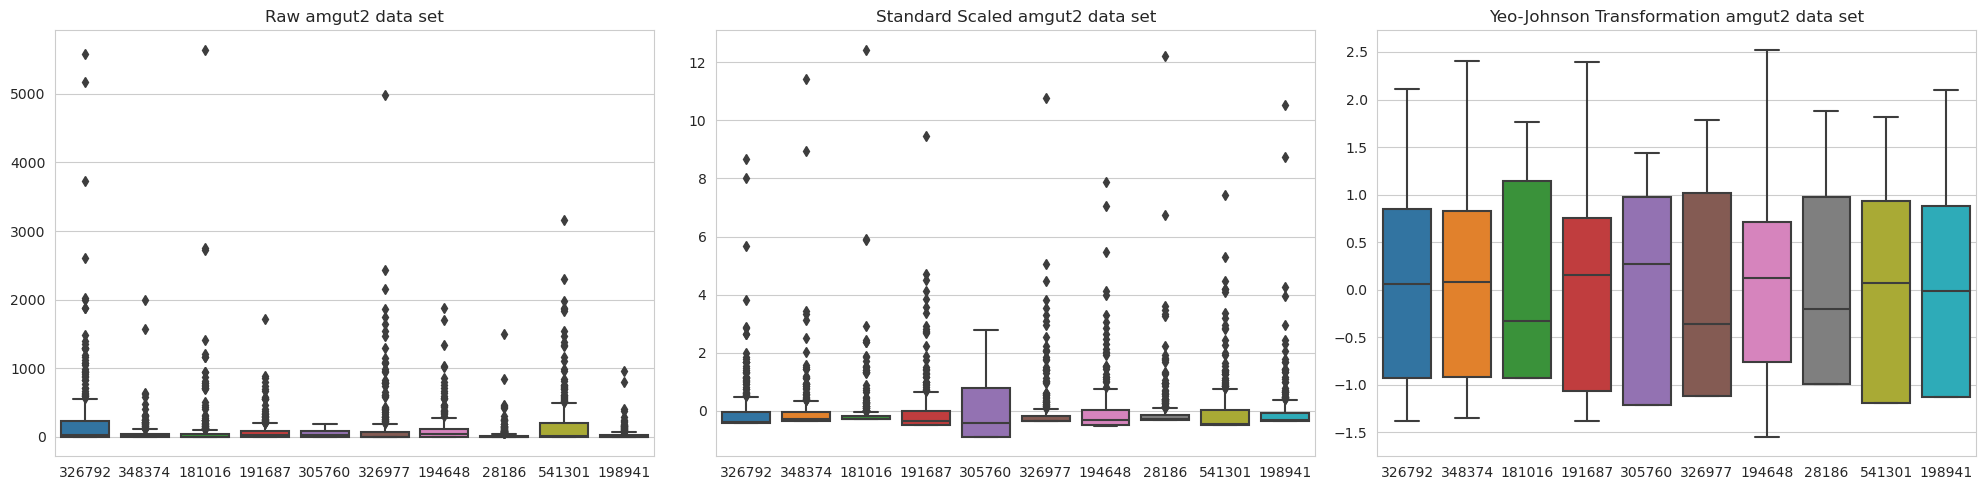

In [2]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the style and size of the plots
sns.set_style("whitegrid")

dataset_name = 'amgut2'
# Create four dataframes with some sample data
df_raw = pd.read_csv('/projects/genomic-ml/da2343/ml_project_1/data/amgut2_data_update.csv')
df_raw = df_raw.iloc[:, :10]

df_ss = pd.read_csv('/projects/genomic-ml/da2343/ml_project_1/data/amgut2_data_standard_scaled.csv')
df_ss = df_ss.iloc[:, :10]

df_pt = pd.read_csv('/projects/genomic-ml/da2343/ml_project_1/data/amgut2_data_power_transformed.csv')
df_pt = df_pt.iloc[:, :10]


# Create a subplot with 1 row and 4 columns
fig, axes = plt.subplots(1, 3)

# increase the size of the plot
fig.set_size_inches(20, 5)

# Create a boxplot for each dataframe in each subplot
sns.boxplot(data=df_raw, ax=axes[0])
axes[0].set_title(f"Raw {dataset_name} data set")

sns.boxplot(data=df_ss, ax=axes[1])
axes[1].set_title(f"Standard Scaled {dataset_name} data set")

sns.boxplot(data=df_pt, ax=axes[2])
axes[2].set_title(f"Yeo-Johnson Transformation {dataset_name} data set")

# Adjust the spacing and layout of the subplots
plt.tight_layout()
plt.show()

# save the plot
# fig.savefig('./necromass_data_dist_boxplots.png', dpi=1500)
